In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")

In [4]:
df.drop_duplicates()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [5]:
# listing city values
unique_cities = df['City'].unique()
print(unique_cities)

['Abidjan' 'Addis Abeba' 'Ahmadabad' 'Aleppo' 'Alexandria' 'Ankara'
 'Baghdad' 'Bangalore' 'Bangkok' 'Belo Horizonte' 'Berlin' 'Bogotá'
 'Bombay' 'Brasília' 'Cairo' 'Calcutta' 'Cali' 'Cape Town' 'Casablanca'
 'Changchun' 'Chengdu' 'Chicago' 'Chongqing' 'Dakar' 'Dalian'
 'Dar Es Salaam' 'Delhi' 'Dhaka' 'Durban' 'Faisalabad' 'Fortaleza' 'Gizeh'
 'Guangzhou' 'Harare' 'Harbin' 'Ho Chi Minh City' 'Hyderabad' 'Ibadan'
 'Istanbul' 'Izmir' 'Jaipur' 'Jakarta' 'Jiddah' 'Jinan' 'Kabul' 'Kano'
 'Kanpur' 'Karachi' 'Kiev' 'Kinshasa' 'Lagos' 'Lahore' 'Lakhnau' 'Lima'
 'London' 'Los Angeles' 'Luanda' 'Madras' 'Madrid' 'Manila' 'Mashhad'
 'Melbourne' 'Mexico' 'Mogadishu' 'Montreal' 'Moscow' 'Nagoya' 'Nagpur'
 'Nairobi' 'Nanjing' 'New Delhi' 'New York' 'Paris' 'Peking' 'Pune'
 'Rangoon' 'Rio De Janeiro' 'Riyadh' 'Rome' 'São Paulo' 'Saint Petersburg'
 'Salvador' 'Santiago' 'Santo Domingo' 'Seoul' 'Shanghai' 'Shenyang'
 'Singapore' 'Surabaya' 'Surat' 'Sydney' 'Taipei' 'Taiyuan' 'Tangshan'
 'Tianjin' 'Toky

In [6]:
# creating list of cities to be studied
target_cities = ['Tokyo', 'Melbourne', 'New York', 'Cape Town', 'Paris', 'Cairo', 'Santiago', 'Brasilia', 'Delhi', 'Ho Chi Minh City', 'Los Angeles']

In [7]:
# creating df of target cities
df2 = df[df['City'].isin(target_cities)]

In [8]:
df2

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
34810,1808-10-01,22.216,1.875,Cairo,Egypt,29.74N,31.38E
34811,1808-11-01,17.766,2.211,Cairo,Egypt,29.74N,31.38E
34812,1808-12-01,11.338,1.971,Cairo,Egypt,29.74N,31.38E
34813,1809-01-01,10.337,2.911,Cairo,Egypt,29.74N,31.38E
34814,1809-02-01,12.113,2.848,Cairo,Egypt,29.74N,31.38E
...,...,...,...,...,...,...,...
229685,2013-05-01,16.757,0.396,Tokyo,Japan,36.17N,139.23E
229686,2013-06-01,20.927,0.489,Tokyo,Japan,36.17N,139.23E
229687,2013-07-01,24.645,0.404,Tokyo,Japan,36.17N,139.23E
229688,2013-08-01,26.364,0.461,Tokyo,Japan,36.17N,139.23E


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23673 entries, 34810 to 229689
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             23673 non-null  object 
 1   AverageTemperature             23027 non-null  float64
 2   AverageTemperatureUncertainty  23027 non-null  float64
 3   City                           23673 non-null  object 
 4   Country                        23673 non-null  object 
 5   Latitude                       23673 non-null  object 
 6   Longitude                      23673 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.4+ MB


In [10]:
df2['dt'] = pd.to_datetime(df2['dt'])

In [11]:
df2['Year'] = df2['dt'].dt.year

In [12]:
# checking NaN values
for cols in df2.columns:
    print(f"{cols}: {df2[cols].isna().sum()}")

dt: 0
AverageTemperature: 646
AverageTemperatureUncertainty: 646
City: 0
Country: 0
Latitude: 0
Longitude: 0
Year: 0


In [13]:
# removing NaN
df3 = df2[df2['AverageTemperature'].notna()]

In [14]:
# check NaN removal result
print("Nan Value Counts:")
for col in df2.columns:
    print(f"{col}: {df3[col].isna().sum()}")

Nan Value Counts:
dt: 0
AverageTemperature: 0
AverageTemperatureUncertainty: 0
City: 0
Country: 0
Latitude: 0
Longitude: 0
Year: 0


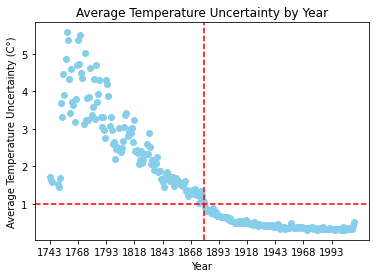

In [15]:
# plot average uncertainty by year
average_uncertainty_by_year = df3.groupby('Year')['AverageTemperatureUncertainty'].mean()

plt.scatter(average_uncertainty_by_year.index, average_uncertainty_by_year.values, color='skyblue')
plt.title('Average Temperature Uncertainty by Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature Uncertainty (C°)')
plt.xticks(range(min(df3['Year']), max(df3['Year'])+1, 25))
plt.axhline(y=1, color='red', linestyle='--', label='y = 1')
plt.axvline(x=1880, color='red', linestyle='--', label='x = 1')
plt.show()

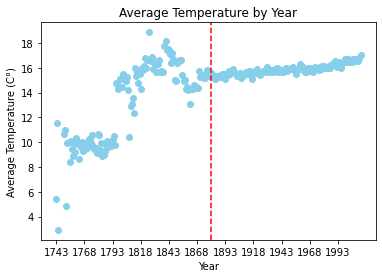

In [16]:
# plot avg temp by year
average_temp_by_year = df3.groupby('Year')['AverageTemperature'].mean()

plt.scatter(average_temp_by_year.index, average_temp_by_year.values, color='skyblue')
plt.title('Average Temperature by Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature (C°)')
plt.xticks(range(min(df3['Year']), max(df3['Year'])+1, 25))
plt.axvline(x=1880, color='red', linestyle='--', label='x = 1')
plt.show()

In [17]:
df4 = df3[df3['Year'] > 1879]

In [18]:
df4

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
35665,1880-01-01,10.418,1.054,Cairo,Egypt,29.74N,31.38E,1880
35666,1880-02-01,13.988,0.713,Cairo,Egypt,29.74N,31.38E,1880
35667,1880-03-01,15.382,1.018,Cairo,Egypt,29.74N,31.38E,1880
35668,1880-04-01,21.037,1.491,Cairo,Egypt,29.74N,31.38E,1880
35669,1880-05-01,24.740,0.844,Cairo,Egypt,29.74N,31.38E,1880
...,...,...,...,...,...,...,...,...
229684,2013-04-01,11.310,0.493,Tokyo,Japan,36.17N,139.23E,2013
229685,2013-05-01,16.757,0.396,Tokyo,Japan,36.17N,139.23E,2013
229686,2013-06-01,20.927,0.489,Tokyo,Japan,36.17N,139.23E,2013
229687,2013-07-01,24.645,0.404,Tokyo,Japan,36.17N,139.23E,2013


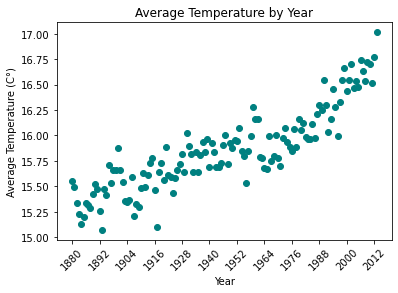

In [19]:
# plot avergae temp by year in new date range
average_temp_by_year = df4.groupby('Year')['AverageTemperature'].mean()

plt.scatter(average_temp_by_year.index, average_temp_by_year.values, color='#008080')
plt.title('Average Temperature by Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature (C°)')
plt.xticks(range(min(df4['Year']), max(df4['Year'])+1, 12))
plt.xticks(rotation=45)
plt.show()

In [20]:
# remove tempurature outliers
temp_Q1 = df['AverageTemperature'].quantile(.25)
temp_Q3 = df['AverageTemperature'].quantile(.75)

temp_IQR = temp_Q3 - temp_Q1

df5 = df4[df4['AverageTemperature'].between(temp_Q1 - 1.5 * temp_IQR, temp_Q3 + 1.5 * temp_IQR)]

In [21]:
df5

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
35665,1880-01-01,10.418,1.054,Cairo,Egypt,29.74N,31.38E,1880
35666,1880-02-01,13.988,0.713,Cairo,Egypt,29.74N,31.38E,1880
35667,1880-03-01,15.382,1.018,Cairo,Egypt,29.74N,31.38E,1880
35668,1880-04-01,21.037,1.491,Cairo,Egypt,29.74N,31.38E,1880
35669,1880-05-01,24.740,0.844,Cairo,Egypt,29.74N,31.38E,1880
...,...,...,...,...,...,...,...,...
229684,2013-04-01,11.310,0.493,Tokyo,Japan,36.17N,139.23E,2013
229685,2013-05-01,16.757,0.396,Tokyo,Japan,36.17N,139.23E,2013
229686,2013-06-01,20.927,0.489,Tokyo,Japan,36.17N,139.23E,2013
229687,2013-07-01,24.645,0.404,Tokyo,Japan,36.17N,139.23E,2013


In [22]:
# remove uncertainty outliers
uncertainty_Q1 = df['AverageTemperatureUncertainty'].quantile(.25)
uncertainty_Q3 = df['AverageTemperatureUncertainty'].quantile(.75)

uncertainty_IQR = uncertainty_Q3 - uncertainty_Q1

df6 = df5[df5['AverageTemperatureUncertainty'].between(uncertainty_Q1 - 1.5 * uncertainty_IQR, uncertainty_Q3 + 1.5 * uncertainty_IQR)]

In [23]:
df6

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
35665,1880-01-01,10.418,1.054,Cairo,Egypt,29.74N,31.38E,1880
35666,1880-02-01,13.988,0.713,Cairo,Egypt,29.74N,31.38E,1880
35667,1880-03-01,15.382,1.018,Cairo,Egypt,29.74N,31.38E,1880
35668,1880-04-01,21.037,1.491,Cairo,Egypt,29.74N,31.38E,1880
35669,1880-05-01,24.740,0.844,Cairo,Egypt,29.74N,31.38E,1880
...,...,...,...,...,...,...,...,...
229684,2013-04-01,11.310,0.493,Tokyo,Japan,36.17N,139.23E,2013
229685,2013-05-01,16.757,0.396,Tokyo,Japan,36.17N,139.23E,2013
229686,2013-06-01,20.927,0.489,Tokyo,Japan,36.17N,139.23E,2013
229687,2013-07-01,24.645,0.404,Tokyo,Japan,36.17N,139.23E,2013


In [24]:
# function to convert latitude and longitude to positive and negative, dropping directional character
def convert_lat_lon(value):
    numeric_value = float(value[:-1])
    direction = -1 if value.endswith('S') or value.endswith('W') else 1
    return numeric_value * direction

In [25]:
# apply conver_lat_lon to the entire dataset
df6['Latitude'] = df6['Latitude'].apply(convert_lat_lon)
df6['Longitude'] = df6['Longitude'].apply(convert_lat_lon)

In [26]:
# breif data summary
df6.describe()

,AverageTemperature,AverageTemperatureUncertainty,Latitude,Longitude,Year
count,16019.000000,16019.000000,16019.000000,16019.000000,16019.000000
mean,15.879012,0.453352,12.556690,25.777188,1946.379050
std,8.778704,0.295783,32.237004,87.739655,38.582947
min,-7.058000,0.049000,-37.780000,-118.700000,1880.000000
25%,9.852000,0.261000,-32.950000,-69.890000,1913.000000
50%,15.743000,0.372000,29.740000,31.380000,1946.000000
75%,22.599000,0.553000,36.170000,107.180000,1980.000000
max,36.339000,2.785000,49.030000,144.410000,2013.000000


In [27]:
# export cleaned dataset
df6.to_csv('cleaned_dataframe.CSV', index=False)

In [28]:
# cleaning newly added dataset: Global Land Temperatures
global_df = pd.read_csv('GlobalTemperatures.csv')

In [29]:
global_df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [33]:
# checking for NaN 
print("Nan Value Counts:")
for col in global_df.columns:
    print(f"{col}: {global_df[col].isna().sum()}")

Nan Value Counts:
dt: 0
LandAverageTemperature: 0
LandAverageTemperatureUncertainty: 0
LandMaxTemperature: 1188
LandMaxTemperatureUncertainty: 1188
LandMinTemperature: 1188
LandMinTemperatureUncertainty: 1188
LandAndOceanAverageTemperature: 1188
LandAndOceanAverageTemperatureUncertainty: 1188


In [32]:
# removing NaN
global_df = global_df[global_df['LandAverageTemperature'].notna()]

In [35]:
# export global set with nan removed
global_df.to_csv('GlobalTemperatures.csv', index=False)